## Read numpy matrix to build NetworkX graph

From what I understand NetworkX is a worthy interface to graph calculations, I believe on rather large scale data. I'm trying to balance being able to do the whole experiment I'm aiming for, which is calculating statistics of the graph, with gleaning some more local (practical?) insights, like what are the k-nearest neighbors for a particular node of the graph, what's the clustering coefficient, the radius, etc.

This notebook is on building a networkx graph directly from the adjacency matrix, which I've also called the edgeweight matrix. The first step that I haven't done yet for this experiment is explore the edgeweights themselves. That is, define a $\tau$ such that an edge exists if the similarity is greater than $\tau$. 

(<matplotlib.figure.Figure at 0x10efe4128>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10efbdc50>)

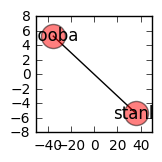

In [4]:
%matplotlib inline
import numpy as np
import networkx as nx

from util import vis_graph

# simple experiment

a = np.array([[0, 1], [1, 0]])

g = nx.from_numpy_matrix(a)

mapping = {0:'hooba', 1:'stank', 2:'hootie'}
g = nx.relabel_nodes(g, mapping)

vis_graph(g, figsize=(1.5, 1.5))

OK, so we can label pretty easily and use a mapping to do it. Looks like those pieces will be pretty easy to put together later. For now we can just focus on creating the $a_{ij} \in \{1, 0\}$ adjacency matrix. For this I want a little more intuition on what, say, the "trump" word similarity values are.

In [ ]:
from build_network import build_network, PPMI, Embedding
from util import get_corpus_text

texts, _ = get_corpus_text('Sample Week for Zipf experiment', 'FOXNEWSW')

In [41]:
e = Embedding.from_ppmi(PPMI.from_texts(texts))

In [42]:
e.make_edgweight_mat()

In [43]:
emat = e.edgeweight_mat

In [44]:
wl = e.word_lookup
il = e.index_lookup

wll = list(wl.items())
ill = list(il.items())

print(wll[:10])
print(ill[:10])

[('cry', 533), ('deserve', 2786), ('wars', 3360), ('crying', 2132), ('came', 364), ('louis', 2958), ('deals', 1074), ('admitted', 3095), ('camps', 3310), ('fill', 1805)]
[(0, 'days'), (1, 'lot'), (2, 'work'), (3, 'ahead'), (4, 'donald'), (5, 'trump'), (6, 'great'), (7, 'see'), (8, 'next'), (9, 'news')]


In [45]:
tr_vec = np.copy(emat[wl['trump']])

In [49]:
trv_sorted = np.flipud(np.sort(tr_vec))
print(trv_sorted[:20])
print(trv_sorted[-20:])

[ 1.          0.23310105  0.22198569  0.21496198  0.18717185  0.18183988
  0.18015213  0.1757532   0.17425468  0.17111487  0.16776612  0.16686591
  0.16061475  0.16029349  0.16007062  0.15951875  0.15844346  0.15768894
  0.15744592  0.15695733]
[-0.1505361  -0.15117168 -0.15652013 -0.15747766 -0.15902812 -0.1624958
 -0.16509677 -0.16580425 -0.1680285  -0.17141689 -0.17214809 -0.17474746
 -0.18004288 -0.1842818  -0.19660496 -0.2020338  -0.2063037  -0.21178547
 -0.21252378 -0.22575605]


In [56]:
ran_vec = np.flipud(np.sort(emat[1000]))
print(ran_vec[:10])  # these seem high, and the node label is....
print(il[1000])  # 'reagan' !

[ 1.          0.87085071  0.57788668  0.57067825  0.54482258  0.48825344
  0.45875101  0.43972695  0.400773    0.37423624]
reagan


(array([  1.02800000e+03,   8.21000000e+02,   7.23000000e+02,
          5.15000000e+02,   3.43000000e+02,   2.57000000e+02,
          1.61000000e+02,   7.80000000e+01,   4.10000000e+01,
          1.70000000e+01,   7.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.00000000e+00]),
 array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
         24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.]),
 <a list of 20 Patch objects>)

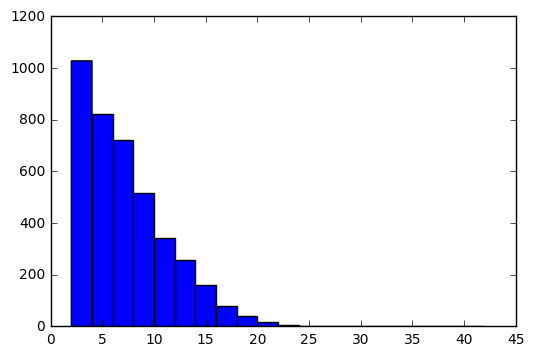

In [91]:
tau = 0.4

adj_mat = np.copy(emat)

adj_mat[adj_mat <= tau] = 0.0
adj_mat[adj_mat > tau] = 1.0

g = nx.from_numpy_matrix(adj_mat)

degs = g.degree()

plt.hist(list(degs.values()), bins=20)

## Conclusion

This is only one week of data, which may be why it's tough to get a zipfian distribution at all. $\tau$ must be set so high that "trump" does not get any neighbors if we set it to the values (around $\tau = 0.4$) that result in a power law-looking histogram.

So, it's time to close this notebook out as I've learned two things:

1. I can do the power law or other statistical fitting/analysis of the graph without labelling
2. When I do want to label this, it's easy to just use [`nx.relabel_nodes`](http://networkx.readthedocs.io/en/stable/reference/generated/networkx.relabel.relabel_nodes.html#networkx.relabel.relabel_nodes), easy peasy